In [1]:
!pip install numpy scipy matplotlib scikit-learn

# 선형회귀 with Python

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

## 오차?

우리가 얻을 수 있는 데이터는 참값이 아니라 항상 오차가 포함되어 있다. 아무리 정밀한 실험을 해도, 아무리 장비를 잘 만들어도 측정오차가 있을 수 밖에 없다. 이러한 오차를 줄이려면 같은 실험을 많이 반복해서 평균을 구하면 된다. 이런 오차는 어느 한쪽으로 치우지지 않기 때문에 (unbiased) 오차의 기댓값은 0일 것이다.

1. 중심극한정리에 의해, 확률변수 $X$에 대하여 $\mathbb{E}[X]=\mu, \mathbb{Var}[X]=\sigma^2$이라고 하면 $n\rightarrow\infty$일 때, $n$회 독립시행의 샘플 평균 $\bar{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$은 실제 확률 분포와 상관 없이 기댓값 $\mu$와 분산 $\frac{\sigma^2}{\sqrt{n}}$ 을 가지는 가우시안 분포에 가까워진다. 

2. 큰 수의 법칙 (Law of Large Numbers)에 의해 아주 큰 $n$에 대해서 다음이 성립하는 $\epsilon>0, \delta>0$이 존재한다.
$$Pr\left[\left\lvert{\frac{1}{n}\sum_{i=1}^{n}X_i - \mathbb{E}[X]}\right\rvert<\epsilon\right]>1-\delta$$

1.,2.에 의해 독립시행을 무한히 반복하면 오차가 클 확률은 0으로 수렴함을 알 수 있다.

## 회귀?
하지만 우리는 '동일한'조건에서 실험을 '무한히'할 수 없다. 돈과 시간의 문제 뿐만 아니라 실험 조건도 변하기 때문이다. 오차를 유도하는 변수가 너무 많이서 이를 전부 고정시키기란 불가능하다. 또한, 애초에 참값이 없는 경우도 있다. 예를 들어, 설문조사를 생각해보자. 사람들의 생각은 전부 다르고, 정답이 없기 때문에 많은 사람들을 설문하여 평균을 구해도 그 값은 기댓값일 뿐, 참값이 아니다. 이런 경우 우리가 얻고 싶은 것은 "경향성"인데, 이것을 어떻게 구할 수 있을까?

예시를 살펴보자. 다음은 분꽃의 종류에 따른 꽃잎의 길이와 너비를 비교한 것이다.

Text(0.5, 1.0, 'Iris plants dataset')

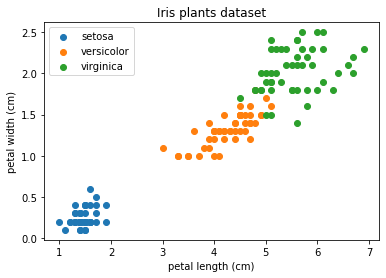

In [3]:
from sklearn.datasets import load_iris
iris = load_iris() # 이것은 유명한 예시 데이터라서 인터페이스가 잘 되었지만 대부분의 데이터는 .csv 형태의 파일로 제공된다는 점에 유의하자.
x = iris.data[:, 2:4]
y = iris.target
plt.scatter(x[y==0][:,0], x[y==0][:, 1], label=iris.target_names[0])
plt.scatter(x[y==1][:,0], x[y==1][:, 1], label=iris.target_names[1])
plt.scatter(x[y==2][:,0], x[y==2][:, 1], label=iris.target_names[2])
plt.legend()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(iris.DESCR.split('\n')[2])

직관적으로, 대체로 꽃잎이 길수록 너비도 길다는 것을 알 수 있다. 하지만 '직관적으로' 라는 말로는 꽃잎의 너비와 길이가 얼마나 연관되어 있는지 수치화하기 어렵다. 이런 경향성을 정확히 표현하기 위해 회귀(regression)를 사용한다. 이런 경향성을 표현하는 함수를 $f$라고 하면 데이터가 이 경향성 함수에서 벗어나는 것을 최소화한다.

- 회귀 regression : $(x_1, y_1), \cdots, (x_n, y_n)$ 이 주어졌을 때, 오차함수 $\mathcal{L}_\mathcal{D}(f)$ (예를 들어, $\frac{1}{2n}\sum_{i=1}^{n} \left\lvert y_i-f(x_i)\right\rvert^2$) 을 최소화하는 함수 $f$를 찾는 것


### 선형 회귀

위 그래프에서 꽃잎의 너비와 길이는 선형적인 관계를 가질 것이라고 예상할 수 있다. 즉, $f$는 1차 함수일 것이다.

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(x[:,0].reshape(-1, 1), x[:,1].reshape(-1, 1))
print(f'R-squared: {regressor.score(x[:,0].reshape(-1, 1), x[:,1].reshape(-1, 1))}')
print(f'equation: y = ({regressor.coef_.item()})*x + ({regressor.intercept_.item()})')

R-squared: 0.9271098389904927
equation: y = (0.41575541635241153)*x + (-0.3630755213190291)


Text(0.5, 1.0, 'Iris plants dataset + regression line')

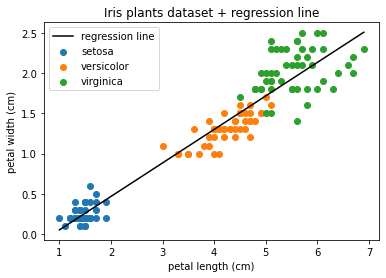

In [5]:
x1_ = np.linspace(min(x[:,0]), max(x[:,0]), 100)
x2_ = regressor.predict(x1_.reshape(-1, 1)).flatten()

plt.scatter(x[y==0][:,0], x[y==0][:, 1], label=iris.target_names[0])
plt.scatter(x[y==1][:,0], x[y==1][:, 1], label=iris.target_names[1])
plt.scatter(x[y==2][:,0], x[y==2][:, 1], label=iris.target_names[2])
plt.plot(x1_, x2_, label='regression line', c='k')
plt.legend()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(iris.DESCR.split('\n')[2] + ' + regression line')

회귀는 크게 보면 기계학습 알고리즘에 포함된다. 상대적으로 간단하고 오래된 만큼 `scipy`, `scikit-learn` 등 다양한 파이썬 패키지에서 그 기능을 제공하고 있다. 조금 더 복잡한 함수의 회귀는 `scipy.optimize`패키지를 찾아보길 바란다. 대표적으로 `curve_fit`이 있다. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

- Q. setosa, versicolor, virginica 를 각각 선형회귀하면 어떨까?

## 회귀의 수학적 배경

우리는 오전 수업에서 **미분**과 **함수의 최대 최소**가 어떻게 관련있는지 배웠다. 이번 시간은 이를 이용해 회귀 중에서 가장 기본적인 최소제곱선형회귀 (Least-Square Linear Regression)를 풀어보자. 회귀는 결국 최소와 문제이다. $\mathcal{L}_\mathcal{D}(f)$를 최소화하는 $f$를 찾자.
$$f^*= \mathrm{arg}\min_{f}\mathcal{L}_\mathcal{D}(f)=\mathrm{arg}\min_{f}{\frac{1}{2n}\sum_{i=1}^{n} \left\lvert y_i-f(x_i)\right\rvert^2} : \left\{(x_i, y_i)\right\}_{i=1}^{n}$$
No Free Lunch Theorem에 의해 $f$에 대한 아무 사전 정보 없이 학습/회귀를 할 수 없다. 우리는 $f$가 변수화(parameterized)되어있다고 가정해야 한다. 예를 들어, $f(x)=a_1x+a_2$이면 $f$는 기울기 $a_1$와 y절편 $a_2$로 변수화된 함수이다. $f$가 $\theta=(\theta_1, \theta_2, \cdots)$로 변수화되었다고 하자.

$$\theta^*= \mathrm{arg}\min_{\theta}\mathcal{L}_\mathcal{D}(f_\theta)=\mathrm{arg}\min_{\theta}{\frac{1}{2n}\sum_{i=1}^{n} \left\lvert y_i-f_\theta(x_i)\right\rvert^2} : \left\{(x_i, y_i)\right\}_{i=1}^{n}$$

위를 만족하는 $\theta$를 찾으려면 미분해야 한다.

$$\frac{\partial}{\partial\theta_k}\mathcal{L}_\mathcal{D}(f_{\theta^*}) = {\frac{1}{n}\sum_{i=1}^{n} (f_\theta(x_i)-y_i})\frac{\partial f_{\theta^*}}{\partial\theta_k}=0$$

아주 복잡해보인다. (이런 문제를 풀려면 analytic한 방법으로는 답이 없고, programming 형식으로 풀어야한다. 대표적으로 stocastic gradient descent가 있다.) 하지만 선형군 함수 (linear family function)을 생각한다면 답이 간단해진다. 
- 선형군 함수: $$f_\theta(x) = \theta_1 \phi_1(x) + \theta_2 \phi_2(x) + \cdots = \sum_{i=1}\theta_k \phi_k(x)$$

그 결과,

$$\frac{\partial}{\partial\theta_k}\mathcal{L}_\mathcal{D}(f_{\theta^*}) = {\frac{1}{n}\sum_{i=1}^{n} (f_\theta(x_i)-y_i})\phi_k(x_i)=0$$

행렬과 행렬의 미분을 배웠다면 간단하고 깔끔하게 풀 수 있다. ($\theta^* = (\Phi^T\Phi)^{-1}\Phi^Ty$) 

하지만 우리가 배운 범위 밖이므로 일단 가장 간단한 경우인 $\phi_1(x)=1, \phi_2(x)=x$인 $f(x)=1+\theta_2x$을 가정해보자. 그러면,

$$\frac{\partial}{\partial\theta_1}\mathcal{L}_\mathcal{D}(f_{\theta^*}) = {\frac{1}{n}\sum_{i=1}^{n} (\theta_1+\theta_2x_i-y_i})=0$$
$$\frac{\partial}{\partial\theta_2}\mathcal{L}_\mathcal{D}(f_{\theta^*}) = {\frac{1}{n}\sum_{i=1}^{n} (\theta_1+\theta_2x_i-y_i})x_i=0$$

계산의 간단함을 위해 $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i, \bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i, \bar{x^2}=\frac{1}{n}\sum_{i=1}^{n}x^2_i, \bar{xy}=\frac{1}{n}\sum_{i=1}^{n}x_iy_i$라고 하자. 그러면,

$$\begin{cases}\theta_1+\theta_2\bar{x}=\bar{y}\\\theta_1\bar{x}+\theta_2\bar{x^2}=\bar{xy}\end{cases}$$

이 연립방정식을 풀면 회귀가 끝난다.

$$f(x)=\theta_2x+\theta_1, \theta_1 = \frac{\bar{x^2}\bar{y}-\bar{x}\bar{xy}}{\bar{x^2}-\bar{x}^2}, \theta_2 = \frac{\bar{x}\bar{y}-\bar{xy}}{\bar{x^2}-\bar{x}^2}$$

## Exercise
제공된 데이터는 2차 세계대전 당시 전세계 날씨를 기록한 데이터이다. 최저 기온(`MinTemp`)이 섭씨 0도일 때, 일평균 기온(`MeanTemp`)과 최고 기온(`MaxTemp`)은 몇 도일지 추정해보자. 이 변수들은 적절한 선형관계를 가지는가? 그 이윤

In [7]:
from pandas import read_csv
data = read_csv('./Summary of Weather.csv')
"""

    코딩 코딩 신나는 노래
    다시 한번 불러보자

"""
est_min = 0
est_mean = 0
est_max = 0
print(f"최저 기온이 {est_min}`C 이면 일평균 기온은 {est_mean}`C이고, 최고기온은 {est_max}`C 이다.")

최저 기온이 0`C 이면 일평균 기온은 0`C이고, 최고기온은 0`C 이다.


/home/quic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Ref.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://www.kaggle.com/smid80/weatherww2